# Title: Bank Marketing


### Case Study : 

>The bank plans to outsourse the customer aquisition work to a Marketing team in India, who intern will be hiring a call center in India.
The Indian Marketing team needs a model to be prepared so that they can reduce call cost and increase the profitability of the deal they have made with the bank in EU. 

>They want me to develop a model that will be used to filter a call list, that that can be used to get good sales. 

### About the Data
Sources

Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

Past Usage:

The full dataset was described and analyzed in:

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.
In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães,
Portugal, October, 2011. EUROSIS.

Relevant Information:

The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.

There are two datasets:
1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).

2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.

The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).
The classification goal is to predict if the client will subscribe a term deposit (variable y).
Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)
Number of Attributes: 16 + output attribute.
Attribute information:
For more information, read [Moro et al., 2011].

Input variables:

bank client data:
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

other attributes:

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17. y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [1]:
import pandas as pd
import numpy as np 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
#Read the data 
data = pd.read_csv("Data/bank-full.csv")

In [3]:
data.y = data.y.map({'yes':1,'no':0})

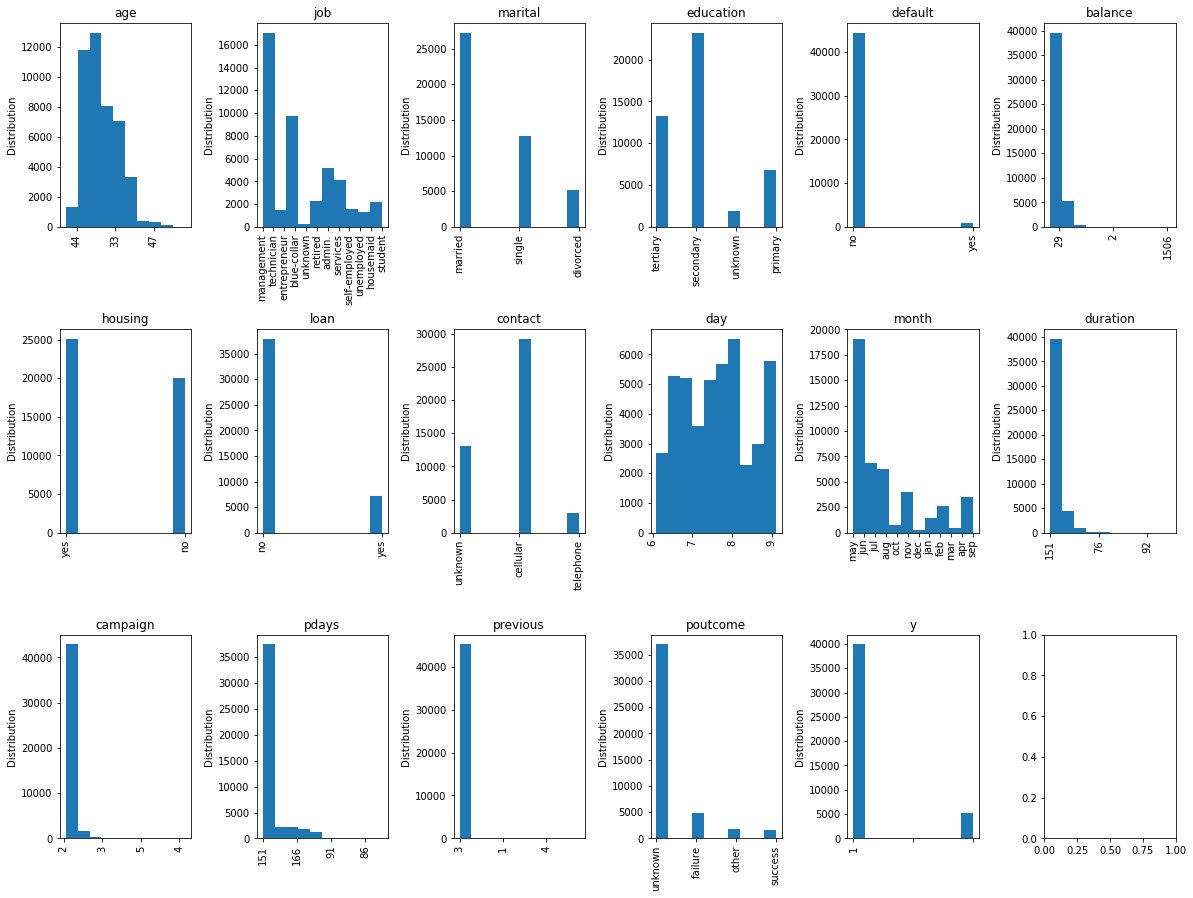

In [4]:
fig, axs = plt.subplots(3,6,figsize=(20,15))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

counter=0
for i in data.columns:
    
    axs[counter].set_title(i)
    axs[counter].hist(data[i])
    axs[counter].set_ylabel("Distribution")
#     plt.xticks(rotation=90)
    axs[counter].set_xticklabels(data[i].unique(),rotation=90)
    counter+=1  

In [5]:
int_cols = data.columns[data.dtypes!='object']
cat_cols = data.columns[data.dtypes =='object']

In [6]:
int_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


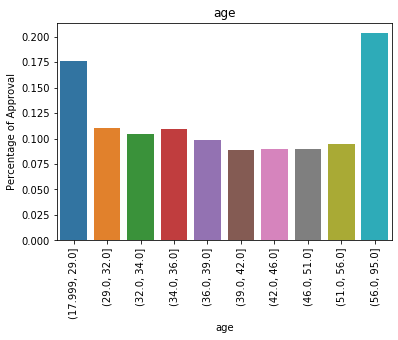

In [7]:
i='age'

data_pivot = data[['y']]
data_pivot[i] = pd.qcut(data[i],q=10,duplicates='drop')
data_plot = pd.pivot_table(data_pivot,'y',i)


plt.title(i)
sns.barplot(data_plot.index,'y',data=data_plot)
plt.ylabel("Percentage of Approval")
plt.xticks(rotation=90) 
plt.show()

C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

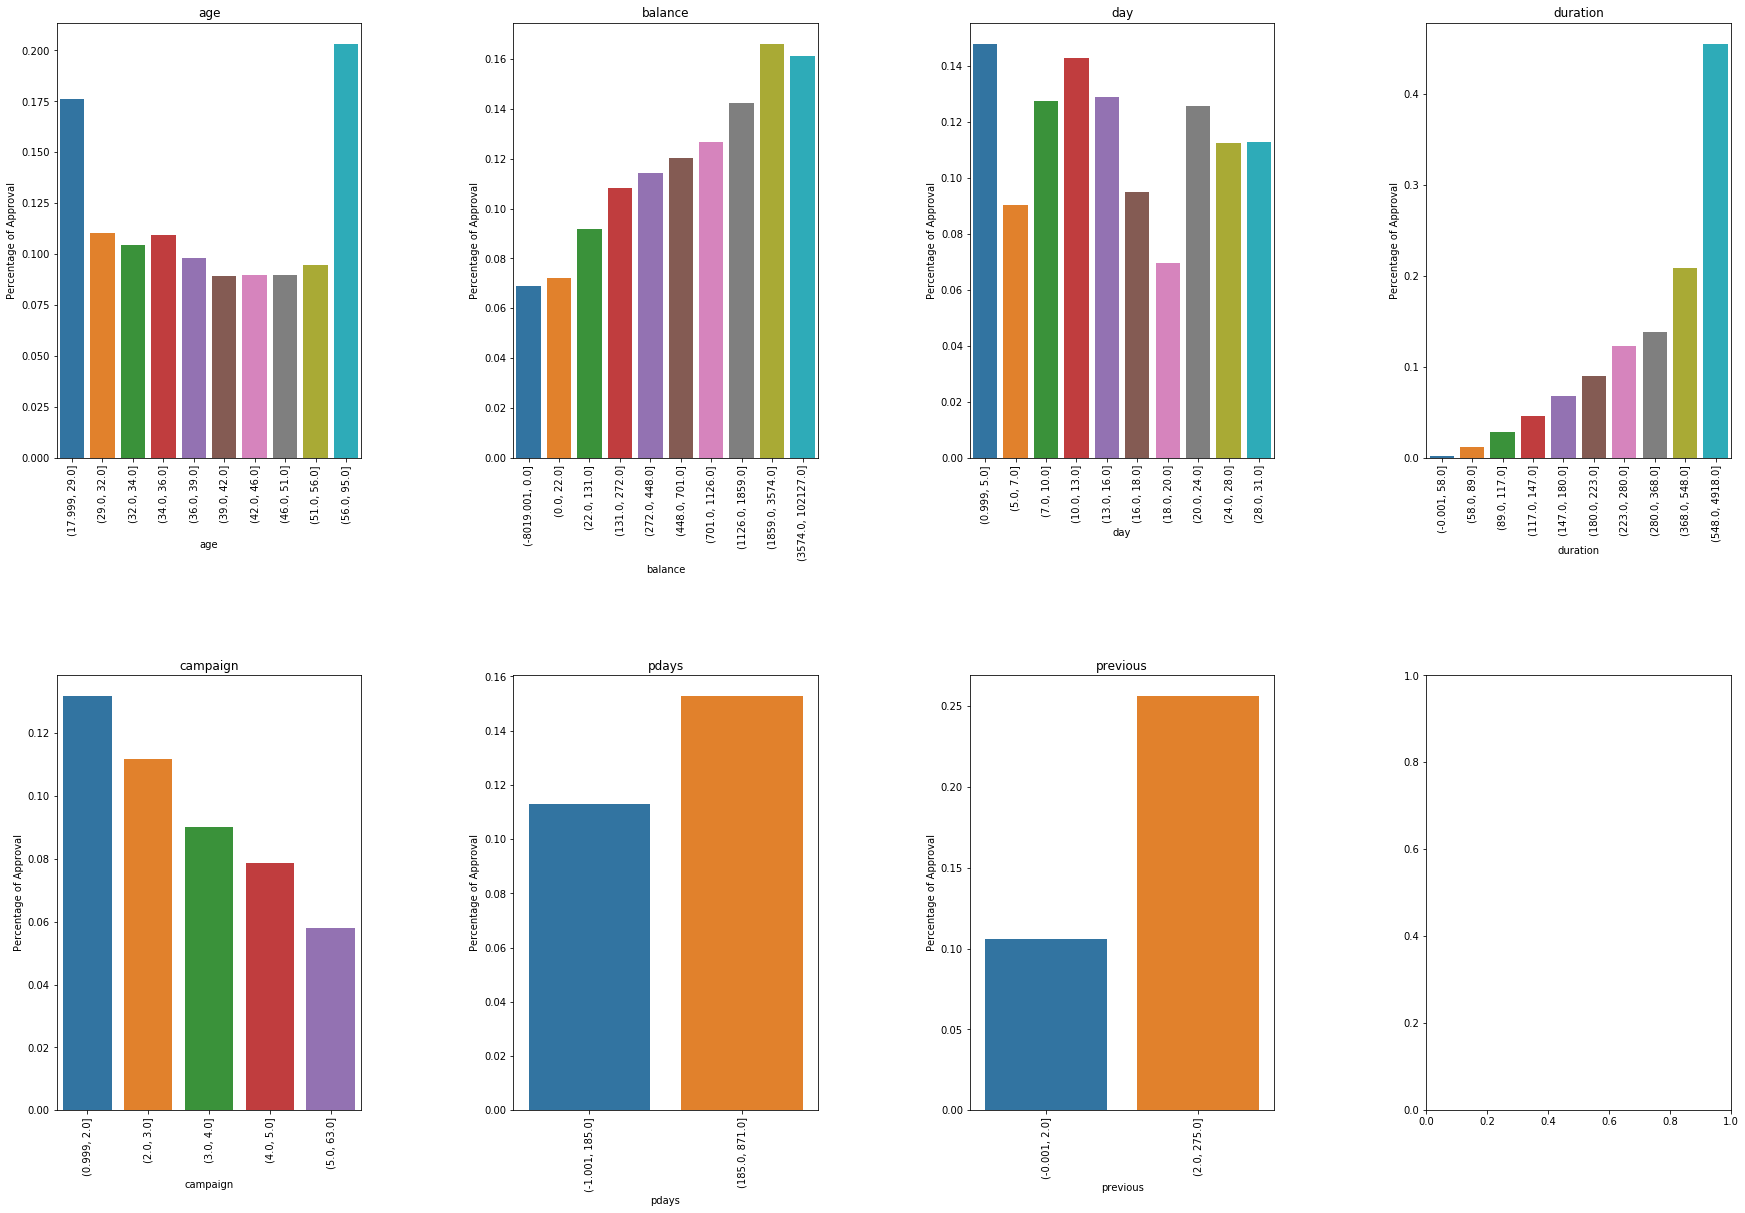

In [8]:
import math
a = math.ceil(len(int_cols)/4)
fig, axs = plt.subplots(a,4,figsize=(30,20))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in int_cols[:-1]:

    
    data_pivot = data[['y']]
    data_pivot[i] = pd.qcut(data[i],q=10,duplicates='drop')
    data_plot = pd.pivot_table(data_pivot,'y',i)

    axs[counter].set_title(i)
    sns.barplot(data_plot.index,'y',data=data_plot,ax=axs[counter])
    axs[counter].set_ylabel("Percentage of Approval")
    axs[counter].set_xticklabels(data_plot.index,rotation=90)
    counter+=1   

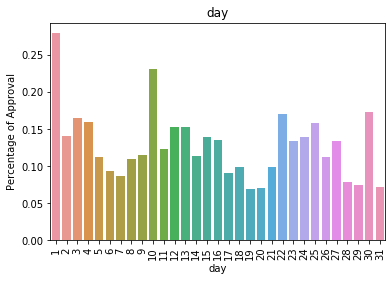

In [9]:
i='day'

data_pivot = data[[i,'y']]
# data_pivot[i] = pd.qcut(data[i],q=10,duplicates='drop')
data_plot = pd.pivot_table(data_pivot,'y',i)


plt.title(i)
sns.barplot(data_plot.index,'y',data=data_plot)
plt.ylabel("Percentage of Approval")
plt.xticks(rotation=90) 
plt.show()

In [10]:
a = []
for i in data['pdays'].values:
    if i!=-1:a.append(i)
bins=[-1,0,np.quantile(a,.25),np.quantile(a,.5),np.quantile(a,.75),np.quantile(a,1)]

                       y
pdays                   
(-1.001, 0.0]   0.091573
(0.0, 133.0]    0.360845
(133.0, 194.0]  0.278240
(194.0, 327.0]  0.138781
(327.0, 871.0]  0.144175


C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


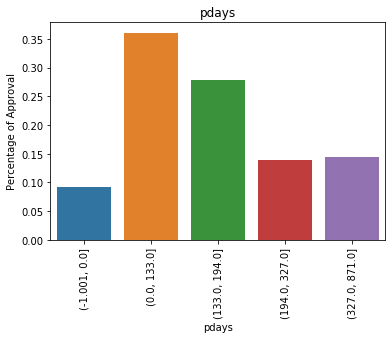

In [11]:
i='pdays'


data_pivot = data[[i,'y']]
data_pivot[i] = pd.cut(data[i],bins=bins,include_lowest=True)
# data_pivot[i] = pd.qcut(data[i],q=40,duplicates='drop')
data_plot = pd.pivot_table(data_pivot,'y',i)

print(data_plot)

plt.title(i)
sns.barplot(data_plot.index,'y',data=data_plot)
plt.ylabel("Percentage of Approval")
plt.xticks(rotation=90) 
plt.show()

In [12]:
a = []
for i in data['previous'].values:
    if i!=-1:a.append(i)
bins=[-1,0,np.quantile(a,1)]

                      y
previous               
(-1.001, 0.0]  0.091573
(0.0, 1.0]     0.210317
(1.0, 275.0]   0.241021


C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


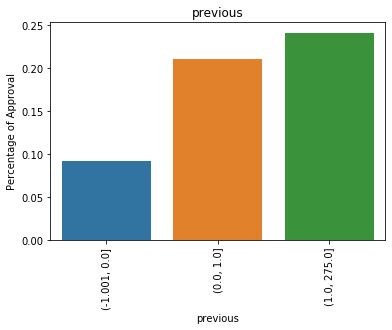

In [13]:
i='previous'

bins = [-1,0,1,275]
data_pivot = data[[i,'y']]
data_pivot[i] = pd.cut(data[i],bins=bins,include_lowest=True)
# data_pivot[i] = pd.qcut(data[i],q=40,duplicates='drop')
data_plot = pd.pivot_table(data_pivot,'y',i)

print(data_plot)

plt.title(i)
sns.barplot(data_plot.index,'y',data=data_plot)
plt.ylabel("Percentage of Approval")
plt.xticks(rotation=90) 
plt.show()

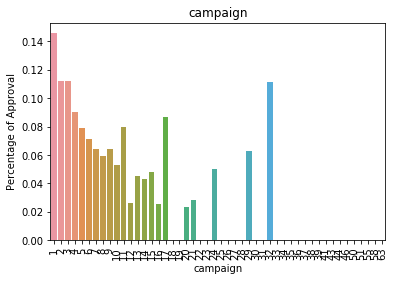

In [14]:
i='campaign'


data_pivot = data[[i,'y']]
# data_pivot[i] = pd.cut(data[i],bins=bins,include_lowest=True)
# data_pivot[i] = pd.qcut(data[i],q=40,duplicates='drop')
data_plot = pd.pivot_table(data_pivot,'y',i)

# print(data_plot)

plt.title(i)
sns.barplot(data_plot.index,'y',data=data_plot)
plt.ylabel("Percentage of Approval")
plt.xticks(rotation=90) 
plt.show()

In [15]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

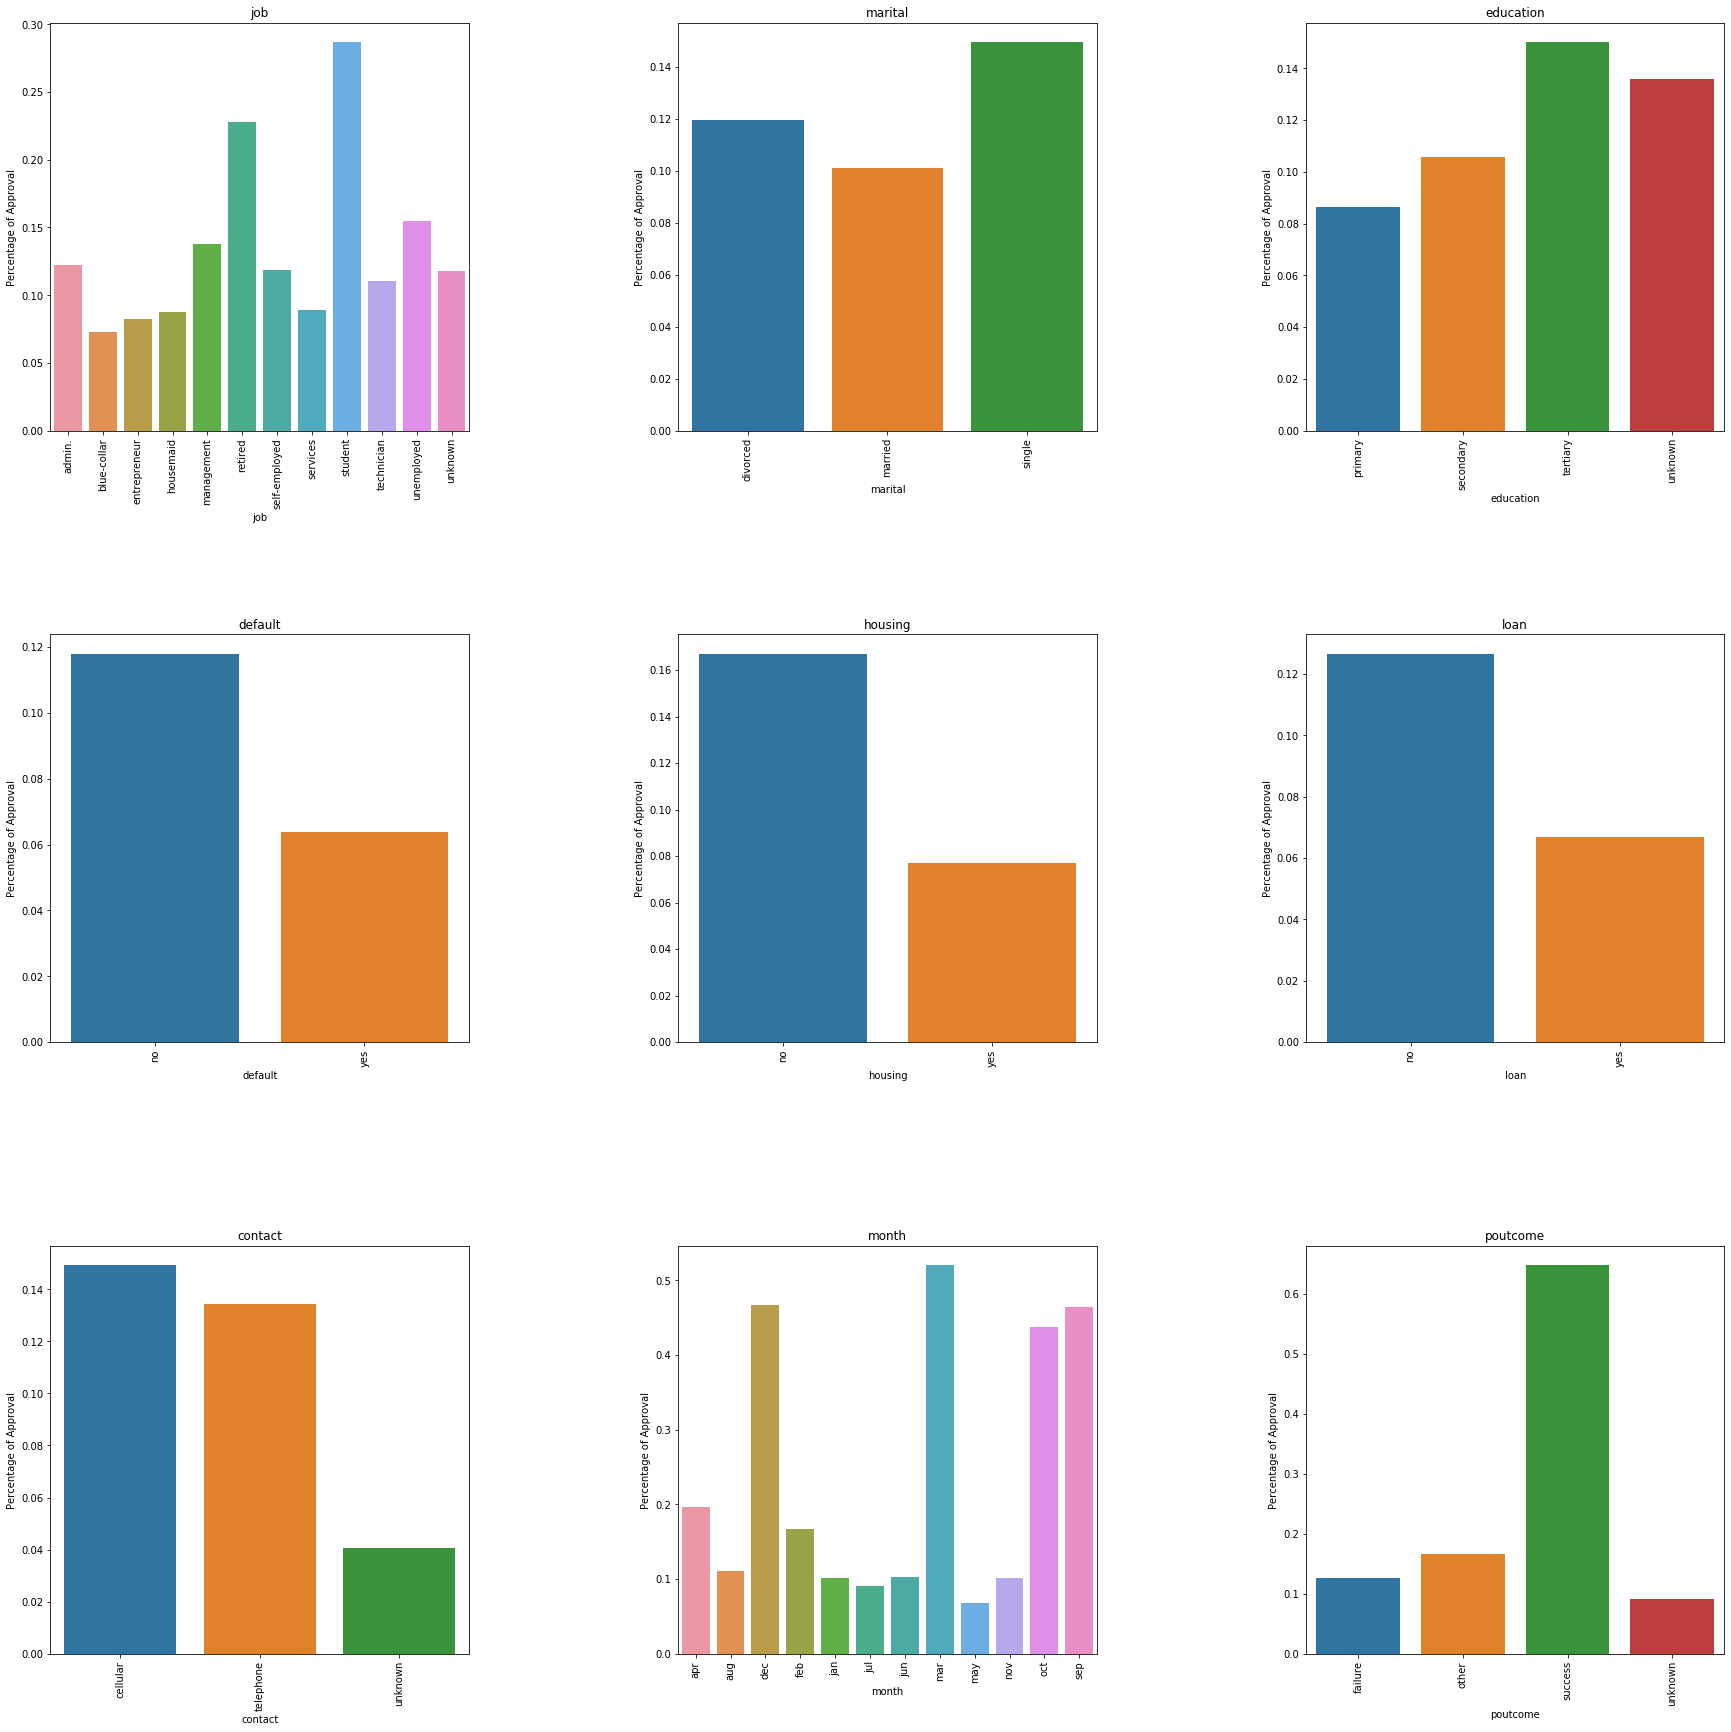

In [16]:
fig, axs = plt.subplots(3,3,figsize=(30,30))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in cat_cols:
    
    data_pivot = data[[i,'y']]
    data_plot = pd.pivot_table(data_pivot,'y',i)
#     print(data_plot)
    
    axs[counter].set_title(i)
    sns.barplot(data_plot.index,'y',data=data_plot,ax=axs[counter])
    axs[counter].set_ylabel("Percentage of Approval")
    axs[counter].set_xticklabels(data_plot.index,rotation=90)
    counter+=1   

In [17]:
check=data[['default', 'housing','loan',]].applymap(lambda x: 0 if x=='no' else 1)
check['y'] = data['y']
pd.pivot_table(check,'y',['housing','default','loan'])

y
housing default loan          
0       0       0     0.183616
                1     0.077889
        1       0     0.070755
                1     0.047619
1       0       0     0.080543
                1     0.060935
        1       0     0.072848
                1     0.052632

### Conclusion EDA

Significant values

* Previous campaign outcome : _poutcome_
* No of days since last contact : _pdays_ 
* _Month_ of Contact
* Contacted before or not? : _previous_ this also is incorporated in _pdays_ : so ignore
* _Duration_ of contact

Lesser Significant 
* Means of _contact_
* _default_
* _Housing_ 
* _Loan_
* _Campaign_ they were advertised
* _Balance_
* _age_ <-> _Job_ (both Highly correlated in terms of significance! Lowerage<->Student + old age<->Retired : high Churn)

#### We will use these data point and create a model

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#using OHE on categorical variable
df = data[['pdays','poutcome','month','contact','campaign','job']]
df['contact_before'] = df['pdays'].apply(lambda x: 0 if x==-1 else 1)
df[['default','housing','loan']]=data[['default', 'housing','loan']].applymap(lambda x: 0 if x=='no' else 1)
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==-1 else x )
df = pd.get_dummies(df)

#using standard scaler only on continuous variables
sc = MinMaxScaler()
df['balance'] = np.cbrt(sc.fit_transform(data[['balance']]))
df['duration'] = np.cbrt(sc.fit_transform(data[['duration']]))
df['pdays'] = np.cbrt(sc.fit_transform(df[['pdays']]))
df

C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\samla\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,pdays,campaign,contact_before,default,housing,loan,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,balance,duration
0,0.000000,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0.451860,0.375795
1,0.000000,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.418061,0.313133
2,0.000000,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0.417593,0.249082
3,0.000000,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.442214,0.265460
4,0.000000,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0.417576,0.342735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.000000,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.431413,0.583493
45207,0.000000,2,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0.445638,0.452611
45208,0.595571,5,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0.499585,0.611944
45209,0.000000,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.428845,0.469200


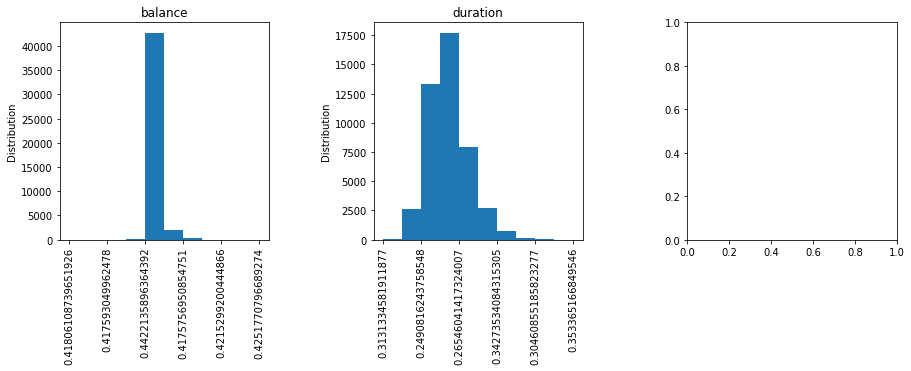

In [19]:
fig, axs = plt.subplots(1,3,figsize=(15,4))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

counter=0
for i in ['balance','duration']:
    
    axs[counter].set_title(i)
    axs[counter].hist(df[i])
    axs[counter].set_ylabel("Distribution")
    axs[counter].set_xticklabels(df[i].unique(),rotation=90)
    counter+=1  

In [71]:
from sklearn.model_selection import train_test_split

X = df
y = data[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Linear SVC 
and KNN

### Linear SVC

In [105]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(max_iter=4000)
lsvc.fit(X_train,y_train.values.ravel())

y_pred = lsvc.predict(X_test)

accuracy_score(y_test,lsvc.predict(X_test))

C:\Users\samla\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8958425475453339

Test Data Accuracy: 0.8958


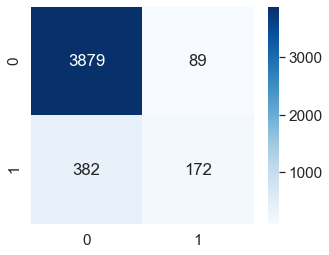

In [106]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3968
           1       0.66      0.31      0.42       554

    accuracy                           0.90      4522
   macro avg       0.78      0.64      0.68      4522
weighted avg       0.88      0.90      0.88      4522



### Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=300)
logreg.fit(X_train,y_train.values.ravel())
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89717


Test Data Accuracy: 0.8972


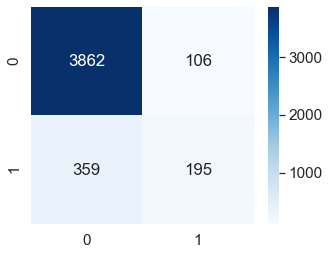

In [110]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3968
           1       0.65      0.35      0.46       554

    accuracy                           0.90      4522
   macro avg       0.78      0.66      0.70      4522
weighted avg       0.88      0.90      0.88      4522



### Logistic Regression after balancing the dataset : Using RandomUnderSampler to balance the data / undersample

In [112]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=0.5)

X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [113]:
y_train_under.y.value_counts()

0    9470
1    4735
Name: y, dtype: int64

In [114]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=300)
logreg.fit(X_train_under,y_train_under.values.ravel())
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87417


Test Data Accuracy: 0.8742


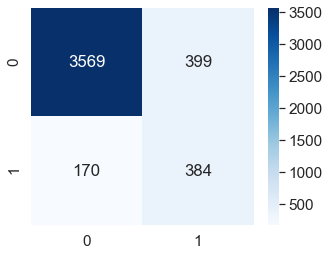

In [115]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3968
           1       0.49      0.69      0.57       554

    accuracy                           0.87      4522
   macro avg       0.72      0.80      0.75      4522
weighted avg       0.90      0.87      0.88      4522



### Lets Use Recursive Feature Eliminition 

In [117]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=4000)

# Select Best X Features
rfe = RFE(logreg, n_features_to_select=None)
rfe = rfe.fit(X_train_under, y_train_under.values.ravel())

In [118]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True  True False False  True False False  True
 False False  True  True False  True  True  True  True  True False False
  True False False False  True False False False False  True False False
  True  True  True]
[ 1 17  1 20  1  1  3  4  1  2 15  1 10  8  1  1 13  1  1  1  1  1  5  6
  1 14  7 11  1 16 12  9 21  1 18 19  1  1  1]


In [121]:
X_train_under_rfe = X_train_under[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_train.columns[rfe.support_]]

In [124]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=300)
logreg.fit(X_train_under_rfe,y_train_under.values.ravel())
y_pred = logreg.predict(X_test_rfe)

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.87019


Test Data Accuracy: 0.8702


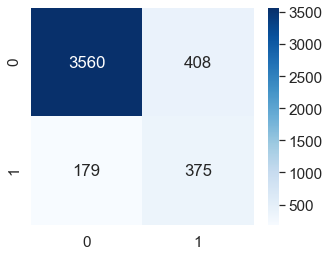

In [125]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3968
           1       0.48      0.68      0.56       554

    accuracy                           0.87      4522
   macro avg       0.72      0.79      0.74      4522
weighted avg       0.89      0.87      0.88      4522



# Conclusion

This model can be used to make a call list that can 

The model reduces the total call list by 1/8th

have a churn ratio of 50%, it covers almost 68% of all the potential 

For the product to be successful the bank needs to sell 5000 quantities, for which we will need data worth of 80,000 customers. 